In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 練習: 用 ```numpy``` 跟 ```matplotlib``` 畫出圓形

(-1.0999999999963033,
 1.099999999999824,
 -1.0999999999991168,
 1.0999999999928904)

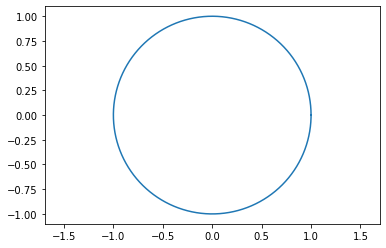

In [3]:
a = 0
b = 0
r = 1
theta = np.arange(0, 2*np.pi, 0.00001)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(x, y)
axes.axis('equal')

### 練習: 比較 $sin$ 函數與 $cos$ 函數的圖形

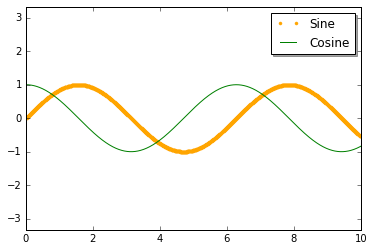

In [4]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('classic')
%matplotlib inline

egg = np.linspace(0,10, 1000)  
fig , ax = plt.subplots()
plt.plot(egg, np.sin(egg), '.', color='orange', label='Sine')
plt.plot(egg, np.cos(egg), '-', color='green', label='Cosine')
ax.axis('equal')
leg = ax.legend(loc='upper right', shadow=True) 

### 練習: 將 COVID 台灣每日新增的確診人數畫出來

In [6]:
request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
time_series = pd.read_csv(request_url)
print(time_series.shape)

id_cols = time_series.columns[:4]
time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
print(time_series_long.shape)

date = pd.to_datetime(time_series_long['Date'])
time_series_long = time_series_long.drop('Date', axis=1)
time_series_long.insert(4, 'Date', date)
time_series_long.head()

tw = time_series_long[time_series_long['Country/Region'] == 'Taiwan*']
daily_increase = np.diff(tw['Confirmed'].values)

date = tw['Date'].values
confirmed = tw['Confirmed'].values

(271, 327)
(87533, 6)


Text(0, 0.5, 'Daily Increase')

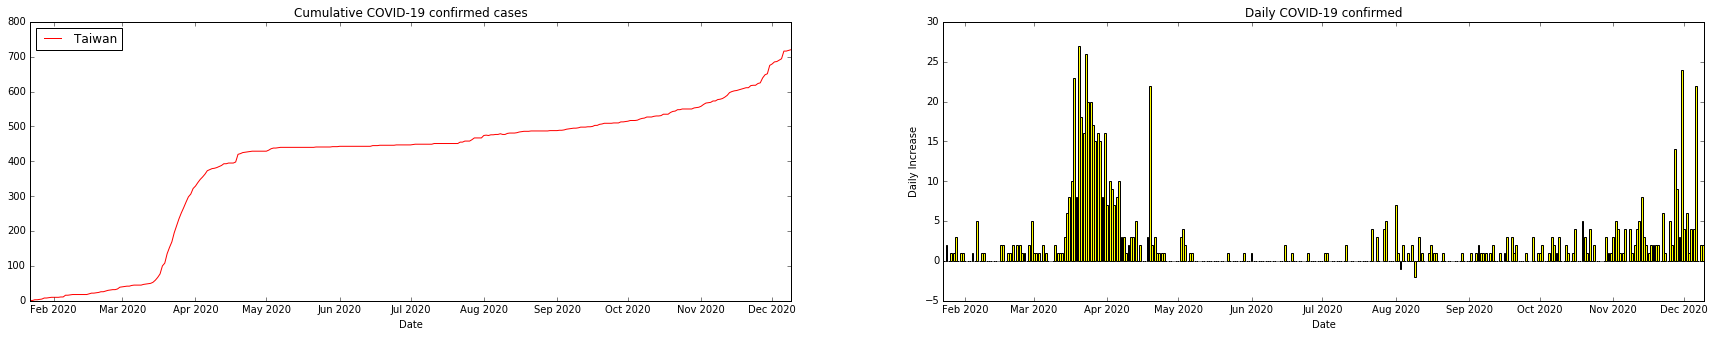

In [9]:
fig = plt.figure(figsize=(30, 5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.plot(date, confirmed, label='Taiwan', color='red')
ax0.set_xlabel('Date')
ax0.set_title('Cumulative COVID-19 confirmed cases')
ax0.legend(loc='upper left')

ax1.bar(date[1:], daily_increase, label='Taiwan', color='yellow') 
# 由於 daily_increase 是每日新增，所以第一天 2020-01-22 的值要扣掉 

ax1.set_title('Daily COVID-19 confirmed')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Increase')
